# PCA and Eigendecomposition

## 1.1 Steps
1. Generate bi-variate normal random numbers
2. Perform PCA on the bi-variate normal random numbers 
3. Perform PCA step-by-step
4. Perform eigendecomposition step-by-step

## 1.2 Generate bi-variate normal random numbers

Generate random numbers from the same multivariate normal distribution. Define μ and Cov, and generate 100 random numbers.
Covariances of multivariate normal distributions, specified as a d-by-d (here d = 2) symmetric, posi- tive semi-definite matrix Cov, the covariance matrix. The covariance matrix is diagonal, containing variances along the diagonal and the covariance off it.

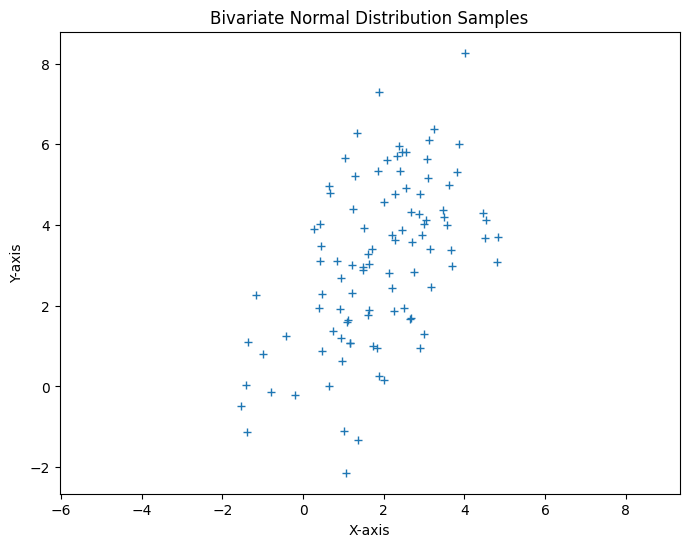

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Define mean and covariance
mu = [2, 3]
Cov = [[2, 1.5], [1.5, 4]]

# For reproducibility( same result every run)
np.random.seed(0)

#Step 2: Generate 100 samples from a bivariate normal distribution
R = np.random.multivariate_normal(mu, Cov, 100)

#Step 3: Plot the samples
plt.figure(figsize=(8, 6))
plt.plot(R[:, 0], R[:, 1], '+')
plt.title('Bivariate Normal Distribution Samples')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.show()


Check sample variance and covariance of the generated data points and the sample correlation between the variables.

In [50]:
#Step 4: Calculate covariance of the samples
sample_cov = np.cov(R, rowvar=False)
print("Sample Covariance Matrix:\n", sample_cov) #Covariance matrix Cov = [[var_x, cov_xy], [cov_yx, var_y]]

#Compute the correlation matrix
sample_cor = np.corrcoef(R, rowvar=False)
print("Sample Correlation Matrix:\n", sample_cor)

Sample Covariance Matrix:
 [[2.04790519 1.5552366 ]
 [1.5552366  4.26664226]]
Sample Correlation Matrix:
 [[1.        0.5261365]
 [0.5261365 1.       ]]


In [51]:
# Extract values
cov_xy = sample_cov[0, 1]
var_x = sample_cov[0, 0]
var_y = sample_cov[1, 1]

# Compute correlation manually
r_manual = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
print("computed correlation:", r_manual)

# Compare with numpy result
print("From np.corrcoef():", sample_cor[0, 1])


computed correlation: 0.5261364980293056
From np.corrcoef(): 0.5261364980293056


In [52]:
from sklearn.decomposition import PCA

#Perform PCA
pca = PCA(n_components=2)
score = pca.fit_transform(R)
loading_vector = pca.components_.T
variability_explained = pca.explained_variance_ratio_ * 100 # in percentage

print("Loading Vectors(Pprincipal Axes):\n", loading_vector)
print("\nVariance Explained (%):\n", variability_explained)

Loading Vectors(Pprincipal Axes):
 [[ 0.45786841  0.88901998]
 [ 0.88901998 -0.45786841]]

Variance Explained (%):
 [80.2532502 19.7467498]


In [53]:
# 1. Check correlation of PCA scores (should be ~ identity matrix)
score_corr = np.corrcoef(score, rowvar=False)
print("Correlation of PCA Scores:\n", score_corr)

# 2. Check that each loading vector has norm 1
norm_1 = np.linalg.norm(loading_vector[:, 0])
norm_2 = np.linalg.norm(loading_vector[:, 1])
print("\nNorm of loading vector 1:", norm_1)
print("Norm of loading vector 2:", norm_2)

# 3. Check that the dot product is ~ 0
dot_product = np.dot(loading_vector[:, 0], loading_vector[:, 1])
print("\nDot product of loading vectors:", dot_product)


Correlation of PCA Scores:
 [[1.00000000e+00 6.44712243e-16]
 [6.44712243e-16 1.00000000e+00]]

Norm of loading vector 1: 0.9999999999999999
Norm of loading vector 2: 0.9999999999999999

Dot product of loading vectors: 0.0


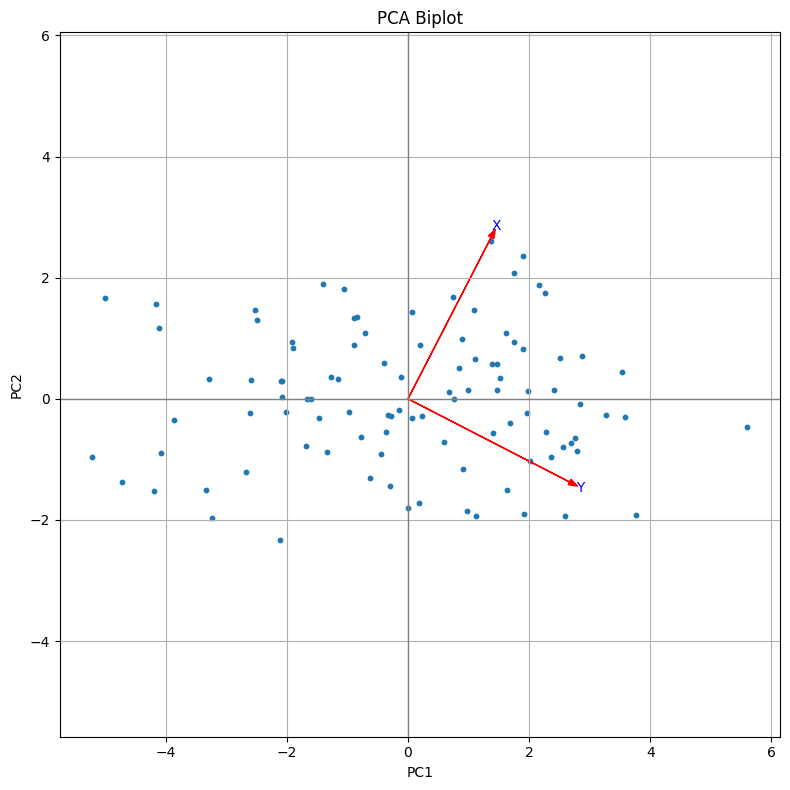

In [54]:
# Biplot-like visualization
plt.figure(figsize=(8, 8))
# Plot the PCA-transformed data(the scores)
plt.scatter(score[:, 0], score[:, 1], s=10, label='Projected data')

# Plot the loading vectors as arrows
for i, var in enumerate(['X', 'Y']):
    plt.arrow(0, 0, 
              loading_vector[i, 0]*3, 
              loading_vector[i, 1]*3, 
              color='r', 
              head_width=0.1)
    plt.text(loading_vector[i, 0]*3.2, loading_vector[i, 1]*3.2, var, color='b', ha='center', va='center')

plt.title('PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.axis('equal')
plt.tight_layout()
plt.show() 

1.4 Perform PCA step-by-step
1. Center and Standardize, i.e., subtracting the mean of the data from the original dataset 
2. Find the covariance matrix of the dataset
3. Find the eigenvectors associated with the greatest eigenvalues of the covariance matrix 
4. Project the original dataset on the eigenvectors


In [55]:
# Step 6.1: Standardize the data manually using sample variances
var_x = sample_cov[0, 0]  # ≈ 2.0479
var_y = sample_cov[1, 1]  # ≈ 4.2666

# Center and scale 
standardized_data = np.zeros_like(R)
standardized_data[:, 0] = (R[:, 0] - np.mean(R[:, 0])) / np.sqrt(var_x)
standardized_data[:, 1] = (R[:, 1] - np.mean(R[:, 1])) / np.sqrt(var_y)




1.4.2 Find the covariance matrix
As before. Check out the effect of standardization on the covariance matrix.

In [56]:
#Compute covariance matrix of the standardized data
standardized_cov = np.cov(standardized_data, rowvar=False)
print("Covariance Matrix of Standardized Data:\n", standardized_cov)

Covariance Matrix of Standardized Data:
 [[1.        0.5261365]
 [0.5261365 1.       ]]


1.4.3 Find the eigenvectors and eigenvalues
Recall the definition of eigenvectors v and -values λ: Av = λv, where A is an n-by-n matrix, v is a column vector of length n, and λ is a scalar.

In [57]:
#Eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(standardized_cov)

# Show results
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors (columns):\n", eigenvectors)


Eigenvalues:
 [1.5261365 0.4738635]

Eigenvectors (columns):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [58]:
# Project standardized data onto eigenvectors (manual PCA scores)
manual_scores = standardized_data @ eigenvectors

# Flip columns to match PCA convention (PC1 first)
manual_scores = np.fliplr(manual_scores)

# Check shape and a few rows
print("Manual PCA Scores (first 5 rows):\n", manual_scores[:5])


Manual PCA Scores (first 5 rows):
 [[-0.09743668 -2.14651212]
 [ 1.22352069 -1.77790625]
 [-1.01305897 -1.85471979]
 [-0.33531608 -1.02679351]
 [ 0.19038839  0.03956299]]


In [59]:
#  Check the correlation of the manually computed PCA scores
manual_score_corr = np.corrcoef(manual_scores, rowvar=False)
print("Correlation of Manual PCA Scores:\n", manual_score_corr)


Correlation of Manual PCA Scores:
 [[1.00000000e+00 2.63280325e-16]
 [2.63280325e-16 1.00000000e+00]]


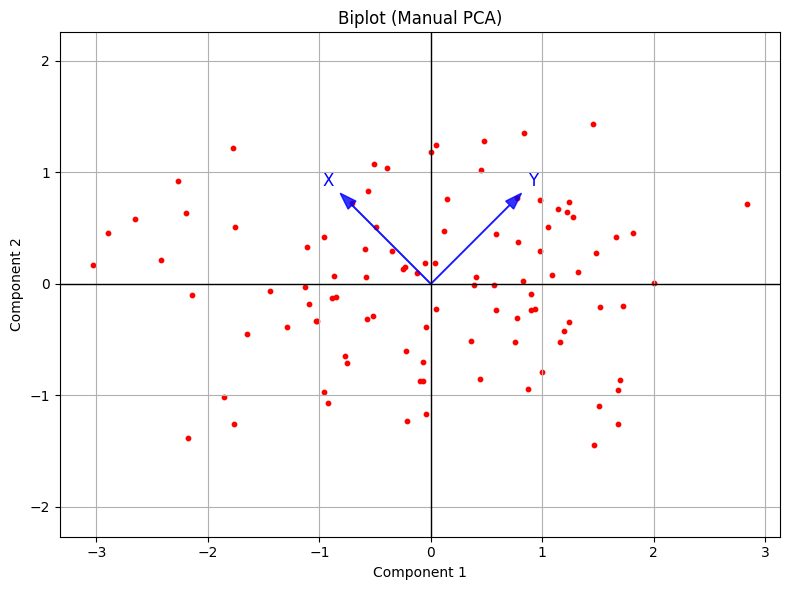

In [66]:
# Flip eigenvectors and scores to match the PCA convention
flipped_eigenvectors = np.fliplr(eigenvectors)
flipped_scores = np.fliplr(manual_scores)

plt.figure(figsize=(8, 6))

# Plot the flipped PCA scores
plt.scatter(flipped_scores[:, 0], flipped_scores[:, 1], color='red', s=10)

# Plot the flipped loading vectors (with correct X/Y labels)
for i, label in enumerate(['X', 'Y']):
    plt.arrow(0, 0,
              flipped_eigenvectors[0, i],
              flipped_eigenvectors[1, i],
              color='blue', alpha=0.8, width=0.005, head_width=0.1)
    plt.text(flipped_eigenvectors[0, i]*1.3,
             flipped_eigenvectors[1, i]*1.3,
             label, color='blue', fontsize=12, ha='center', va='center')

# Grid and axis
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Biplot (Manual PCA)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


The eigenvalues of the covariance matrix indicate the variance in this (new) coordinate direction. We can use this information to calculate the relative variance explained by each component: for each component, we divide the variances according to the eigenvectors by the sum of the variances. In our example, the 1st and 2nd principal component contains 81.26 and 16.53 percent of the total variance in data.

In [67]:
# Variance of each principal component
component_variances = np.var(flipped_scores, axis=0)
explained_variance_ratio = component_variances / np.sum(component_variances)

print("Variance of each component:", component_variances)
print("Explained variance ratio (percent):", explained_variance_ratio * 100)


Variance of each component: [1.51087513 0.46912487]
Explained variance ratio (percent): [76.3068249 23.6931751]


1.5  Perform eigendecomposition step-by-step

1.5.1 Eigenvalues


In [ ]:
#Compute eigenvalues from the characteristic polynomial

# Use the standardized covariance matrix (same as in PDF)
C = standardized_cov.copy()

# Coefficients of the characteristic polynomial: λ² - (tr)λ + det = 0
a = 1
b = - (C[0, 0] + C[1, 1])  # -trace
c = (C[0, 0] * C[1, 1]) - (C[0, 1] * C[1, 0])  # determinant formula

polynomial = [a, b ,c]
# Solve quadratic
eigenvalues_poly = np.roots([a, b, c])
print(C)

print("Eigenvalues (from characteristic equation):", eigenvalues)


[[1.        0.5261365]
 [0.5261365 1.       ]]
Polynomial coefficients: [1, np.float64(-1.9999999999999996), np.float64(0.7231803854414581)]
Eigenvalues (from characteristic equation): [1.5261365 0.4738635]


In [75]:
# Use sympy for high-precision determinant check
import sympy as sp
from sympy import Matrix, N

# Convert to sympy for symbolic accuracy
C_sym = Matrix(C)

# Eigenvalues from earlier
λ1 = float(eigenvalues[0])
λ2 = float(eigenvalues[1])

# Create lambda*I matrices
λI1 = λ1 * sp.eye(2)
λI2 = λ2 * sp.eye(2)

# Compute (C - λI)
Char1 = C_sym - λI1
Char2 = C_sym - λI2

# Compute determinants
det1 = Char1.det()
det2 = Char2.det()

# Print results
print("det(C - λ1 * I):", N(det1))
print("det(C - λ2 * I):", N(det2))


det(C - λ1 * I): 2.22044604925031e-16
det(C - λ2 * I): -1.66533453693773e-16


In [78]:
import sympy as sp

# Use the computed standardized covariance matrix
C_numpy = standardized_cov.copy()
C_sym = sp.Matrix(C_numpy)

# Symbolic variable for eigenvalue
x = sp.Symbol('x')

# Characteristic polynomial: det(C - xI)
char_poly = C_sym.charpoly(x)


# Solve the polynomial for eigenvalues
eigenvalues_manual = sp.solve(char_poly.as_expr(), x)
print("\nEigenvalues (roots of polynomial):", eigenvalues_manual)



Eigenvalues (roots of polynomial): [0.473863501970694, 1.52613649802931]


In [ ]:
import sympy as sp

# Step 1: Symbolic matrix from standardized_cov
C_numpy = standardized_cov.copy()
C_sym = sp.Matrix(C_numpy).applyfunc(lambda x: sp.nsimplify(x, rational=True))

# Step 2: Get eigenvalues from the characteristic polynomial
x = sp.Symbol('x')
char_poly = C_sym.charpoly(x)
eigenvalues_manual = sp.solve(char_poly.as_expr(), x)

print("Eigenvalues:", eigenvalues_manual)

# Step 3: Use the larger eigenvalue (first principal component)
lambda1 = max(eigenvalues_manual)

# Step 4: Compute A = C - λI
A1 = C_sym - lambda1 * sp.eye(2)
A1_rref, _ = A1.rref()

# Step 5: Check determinant and RREF
print("\nRank of A1:", A1.rank())
print("\nDeterminant of A1:", A1.det())
print("\nRREF of A1:")
sp.pprint(A1_rref)


Eigenvalues: [236931750985347/500000000000000, 763068249014653/500000000000000]

Rank of A1: 1

Determinant of A1: 0

RREF of A1:
⎡1  -1⎤
⎢     ⎥
⎣0  0 ⎦


In [85]:
# Step: Extract eigenvector from RREF
v1 = sp.Matrix([1, 1])  # because v1 = v2 from RREF
v1_unit = v1 / v1.norm()

print("Normalized eigenvector for λ1:")
sp.pprint(v1_unit.evalf())


Normalized eigenvector for λ1:
⎡0.707106781186548⎤
⎢                 ⎥
⎣0.707106781186548⎦


In [88]:
# Step 1: Use lambda2 (second eigenvalue)
lambda2 = sp.nsimplify(eigenvalues_sorted[1], rational=True)

# Step 2: Construct A2 = C - λ2 * I
A2 = C_sym - lambda2 * sp.eye(2)

# Step 3: Row-reduce A2 to find free-variable form
A2_rref, _ = A2.rref()

# Step 4: Extract eigenvector direction from RREF: v = [-a, 1]
v2 = sp.Matrix([-A2_rref[0, 1], 1])

# Step 5: Normalize to get unit eigenvector
v2_unit = v2 / v2.norm()

# Step 6: Display results
print("A2 = C - λ2 * I:")
# Convert symbolic A2 to floating-point NumPy array
A2_float = np.array(A2.evalf(), dtype=np.float64)

# Set numpy print options to 4 decimal places
np.set_printoptions(precision=4, suppress=True)

sp.pprint(A2_float)
print("\nRREF of A2:")
sp.pprint(A2_rref)
print("\nNormalized Eigenvector for λ2:")
sp.pprint(v2_unit.evalf())


A2 = C - λ2 * I:
[[0.5261 0.5261] 
 [0.5261 0.5261]]

RREF of A2:
⎡1  1⎤
⎢    ⎥
⎣0  0⎦

Normalized Eigenvector for λ2:
⎡-0.707106781186548⎤
⎢                  ⎥
⎣0.707106781186548 ⎦
